In [1]:
from glob import glob

import os

import matplotlib.pyplot as plt


import numpy as np
import pandas as pd
import wave
import sys

import pydub
from tqdm import tqdm
from pydub import AudioSegment as pas
from scipy.io import arff

import librosa.display
from matplotlib.pyplot import specgram
import librosa as lr
from playsound import playsound

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import joblib

/home/nick/.local/lib/python3.6/site-packages/numba/errors.py:137: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
from collections import Counter

In [3]:
home_path = '/home/nick/Music/results/RE/'
#home_path = '/home/jayant/Desktop/project/'

## let's do some clipping on the music 

### 10000 for 10 sec

In [10]:
l = os.listdir('/home/nick/Music')

In [43]:
for i in l:
    if 'mp3' in i:
        song = pas.from_mp3('/home/nick/Music/' + i)
        ii = i[:-3] + 'wav'
        print(ii)
        op = song[:30000]
        op.export('/home/nick/Music/results/' + ii, format = 'wav')

dhm.wav
ae.wav
tumhi.wav
tum.wav
phir.wav


## DONE CLIPPING AND .WAV CONVERSION

## NEW PLOTTING 

In [10]:
# address of wav files(songs)
audio, freq = lr.load("/home/nick/Music/results/dhm.wav")

time = np.arange(0, len(audio)) / freq

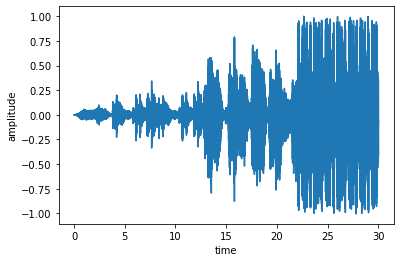

In [11]:
fig, ax = plt.subplots()
ax.plot(time,audio)
ax.set(xlabel = 'time', ylabel = 'amplitude')
plt.show()

## waveform plotting with matplotlib

In [36]:
# adress of wav files
p = os.listdir(home_path + 'results/')

In [38]:
for i in p:
    audio, freq = lr.load(home_path + "results/" + i)
    time = np.arange(0, len(audio)) / freq
    fig, ax = plt.subplots()
    ax.plot(time,audio, 'tab:orange')
    ax.set(xlabel = 'time', ylabel = 'amplitude', title = i)
    plt.show()

/home/nick/.local/lib/python3.6/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


IsADirectoryError: [Errno 21] Is a directory: '/home/nick/Music/results/happy'

In [24]:
Audio(data = audio, rate = freq)

NameError: name 'Audio' is not defined

## Let's plot some spectrograms

/home/nick/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7747: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


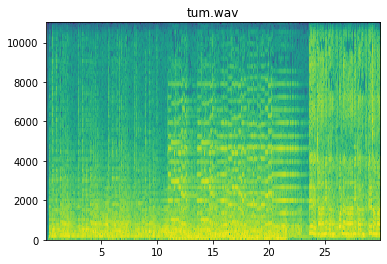

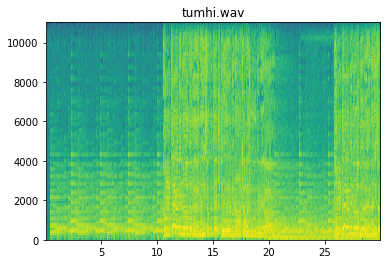

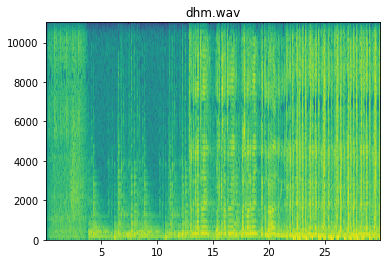

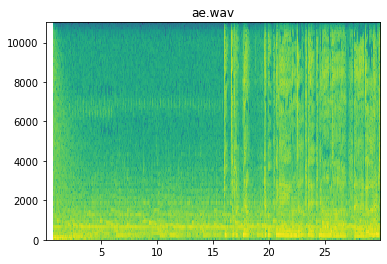

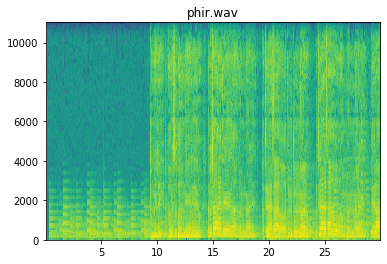

In [11]:
for i in p:
    audio, freq = lr.load("/home/nick/Music/results/" + i)
    specgram(np.array(audio), Fs=22050)
    plt.title(i)
    plt.show()

## LET'S DO SOMETHING NEW, new labeled songs from different folders

## Clipping from each folder

In [3]:
p = os.listdir(home_path + 'cheerful/')
q = os.listdir(home_path + 'lighthearted/')
r = os.listdir(home_path + 'romantic/')
m = os.listdir(home_path + 'melancholy/')

In [40]:
for i in p:
    if 'mp3' in i:
        try:
            song = pas.from_mp3(home_path + 'cheerful/' + i)
            ii = i[:-3] + 'wav'
            op = song[10000:40000]
            op.export(home_path + 'results/cheerful/' + ii, format = 'wav')
        except:
            pass

In [4]:
for i in q:
    if 'mp3' in i:
        try:
            song = pas.from_mp3(home_path + 'lighthearted/' + i)
            ii = i[:-3] + 'wav'
            op = song[10000:40000]
            op.export(home_path + 'lighthearted/' + ii, format = 'wav')        
        except:
            pass

In [5]:
for i in r:
    if 'mp3' in i:
        try:
            song = pas.from_mp3(home_path + 'romantic/' + i)
            ii = i[:-3] + 'wav'
            op = song[10000:40000]
            op.export(home_path + 'romantic/' + ii, format = 'wav')
        except:
            pass
        

In [6]:
for i in m:
    if 'mp3' in i:
        try:
            song = pas.from_mp3(home_path + 'melancholy/' + i)
            ii = i[:-3] + 'wav'
            op = song[10000:40000]
            op.export(home_path + 'melancholy/' + ii, format = 'wav')        
        except:
            pass

# feature extraction methods

## mel spectrogram, mfcc, croma-stft,special contrast, tonnetz

## Feature Extraction

In [23]:
#p = os.listdir('/home/nick/Music/results/happy/')
#q = os.listdir('/home/nick/Music/results/silent/')
p = os.listdir(home_path + 'cheerful/')
q = os.listdir(home_path + 'lighthearted/')
r = os.listdir(home_path + 'romantic/')
m = os.listdir(home_path + 'melancholy/')

In [24]:
feat, lbl = np.empty((0,181)), np.empty(0)
for i in p:
    audio, freq = lr.load(home_path + 'cheerful/' + i)
    stft = np.abs(lr.stft(audio))
    mfcc = np.mean(lr.feature.mfcc(y = audio, sr = freq, n_mfcc=40).T, axis=0)
    mel = np.mean(lr.feature.melspectrogram(audio, sr = freq).T, axis=0)
    contrast = np.mean(lr.feature.spectral_contrast(S = stft, sr = freq).T, axis=0)
    tonnetz = np.mean(lr.feature.tonnetz(y = lr.effects.harmonic(audio), sr = freq).T, axis=0)
    ext_feat = np.hstack([mfcc, mel, contrast, tonnetz])
    feat = np.vstack([feat, ext_feat])
    lbl = np.append(lbl, 'cheerful')
    print(i)
tr_feat = np.array(feat)
tr_lbl = np.array(lbl)
print(tr_feat.shape, tr_lbl.shape)
tr_lbl

Emiway - Machayenge Lyrics Video _ Latest Hindi Rap Song 2019 _ Indian Hip Hop.wav
01 Daddy Mummy (Bhaag Johnny) 190Kbps.wav
05.Angreji Beat-MP3-[R!ckyKT].wav
Dhanno.wav
03 Ishq E Fillum - Shamitabh-1.wav
03 - Raat Bhar (SoundWap.Com).wav
Padmaavat_ Khalibali Full Audio Song _ Deepika Padukone _ Shahid Kapoor _ Ranveer Singh ( 160kbps ).wav
01_Patakha_Guddi_(Female_Version)_(SoundWap.Com).wav
01 Chalti Hai Kya 9 Se 12 - Judwaa 2 - 190Kbps.wav
02 Paro - Pyaar Ka Punchnama 2 (Dev Negi) 190Kbps.wav
Lat Lag Gayee - Race 2.wav
Rowdy Rathore - 01 - Dhadhang Dhang.wav
Aao Raja (Gabbar Is Back) Yo Yo Honey Singh 190Kbps.wav
Lucky Tu Lucky Me.wav
Chittiyaan Kalaiyaan.wav
01.Party On My Mind.wav
Galat Baat Hai.wav
Rowdy Rathore - 02 - Chinta Ta Ta Chita Chita.wav
Hook Up Song -  Student Of The Year 2 _ Tiger Shroff & Alia _ Vishal and Shekhar _Neha Kakkar_Kumaar.wav
01 Sharabi (Pyaar Ka Punchnama 2) 192Kbps.wav
Mein Sharabi _ Cocktail _ Saif Ai Khan, Deepika Padukone _ Yo Yo Honey Singh ( 128kbp

array(['cheerful', 'cheerful', 'cheerful', 'cheerful', 'cheerful',
       'cheerful', 'cheerful', 'cheerful', 'cheerful', 'cheerful',
       'cheerful', 'cheerful', 'cheerful', 'cheerful', 'cheerful',
       'cheerful', 'cheerful', 'cheerful', 'cheerful', 'cheerful',
       'cheerful', 'cheerful'], dtype='<U32')

## saving the features an labels in csv

In [ ]:
np.savetxt('tr_feat.csv', tr_feat, delimiter=',')
np.savetxt('tr_lbl.csv', tr_lbl, delimiter=',')

In [7]:
d = p
a = pd.read_csv('tr_feat.csv')
b = pd.read_csv('tr_lbl.csv')
a.shape,b.shape

c = pd.concat([d, a, b], axis=1)
c

c.to_csv('feat.csv')

NameError: name 'd' is not defined

In [25]:
feat, lbl = np.empty((0,181)), np.empty(0)
for i in q:
    audio, freq = lr.load(home_path + 'lighthearted/' + i)
    stft = np.abs(lr.stft(audio))
    mfcc = np.mean(lr.feature.mfcc(y = audio, sr = freq, n_mfcc=40).T, axis=0)
    mel = np.mean(lr.feature.melspectrogram(audio, sr = freq).T, axis=0)
    contrast = np.mean(lr.feature.spectral_contrast(S = stft, sr = freq).T, axis=0)
    tonnetz = np.mean(lr.feature.tonnetz(y = lr.effects.harmonic(audio), sr = freq).T, axis=0)
    ext_feat = np.hstack([mfcc, mel, contrast, tonnetz])
    feat = np.vstack([feat, ext_feat])
    lbl = np.append(lbl, 'lighthearted')

tr_feat2 = np.array(feat)
tr_lbl2 = np.array(lbl)
print(tr_feat2.shape, tr_lbl2.shape)
tr_lbl2

(23, 181) (23,)


array(['lighthearted', 'lighthearted', 'lighthearted', 'lighthearted',
       'lighthearted', 'lighthearted', 'lighthearted', 'lighthearted',
       'lighthearted', 'lighthearted', 'lighthearted', 'lighthearted',
       'lighthearted', 'lighthearted', 'lighthearted', 'lighthearted',
       'lighthearted', 'lighthearted', 'lighthearted', 'lighthearted',
       'lighthearted', 'lighthearted', 'lighthearted'], dtype='<U32')

In [8]:
feat, lbl = np.empty((0,181)), np.empty(0)
for i in r:
    audio, freq = lr.load(home_path + 'romantic/' + i)
    stft = np.abs(lr.stft(audio))
    mfcc = np.mean(lr.feature.mfcc(y = audio, sr = freq, n_mfcc=40).T, axis=0)
    mel = np.mean(lr.feature.melspectrogram(audio, sr = freq).T, axis=0)
    contrast = np.mean(lr.feature.spectral_contrast(S = stft, sr = freq).T, axis=0)
    tonnetz = np.mean(lr.feature.tonnetz(y = lr.effects.harmonic(audio), sr = freq).T, axis=0)
    ext_feat = np.hstack([mfcc, mel, contrast, tonnetz])
    feat = np.vstack([feat, ext_feat])
    lbl = np.append(lbl, 'romantic')
    print(i)
    
tr_feat3 = np.array(feat)
tr_lbl3 = np.array(lbl)
print(tr_feat3.shape, tr_lbl3.shape)
tr_lbl3

Aa jao meri tamanna.wav
Gulabi (Shuddh Desi Romance) -320Kbps [DJMaza].wav
Bahara.wav
Hosanna.wav
Kaun Tujhe.wav
Chahun Main Ya Na.wav
Khuda Jaane.wav
Jab Dil Mile.wav
Ek Pyaar Ka Nagma - Tony Kakkar ( 160kbps ).wav
Dil Ibadat.wav
_Thoda Aur_ Lyrical _ Ranchi Diaries _ Arijit Singh _ Palak M _Jeet G Manoj M _ Soundarya S_Himansh ( 256kbps cbr ).wav
Jab Se Tere Naina.wav
Zindagi Bana Loon.wav
Kya mujhe pyaar hai.wav
Dheere Dheere (Yo Yo Honey Singh) -190Kbps  PagalWorld.Com .wav
03 Aaj Jane Ki Zid Na Karo - Shilpa Rao 190Kbps.wav
Bakhuda Tumhi Ho.wav
Dil Mein Chhupa Loonga(dailymaza.com).wav
02 Zaalima - Raees (Arijit Singh) 190kbps.wav
Hangover.wav
07 Tu Itni Khoobsurat Hai (Reloaded) - Barkhaa (Juben) 190Kbps.wav
Zara Sa.wav
01 Teri Meri Kahaani (Gabbar is Back) Arijit Singh 190Kbps.wav
(23, 181) (23,)


array(['romantic', 'romantic', 'romantic', 'romantic', 'romantic',
       'romantic', 'romantic', 'romantic', 'romantic', 'romantic',
       'romantic', 'romantic', 'romantic', 'romantic', 'romantic',
       'romantic', 'romantic', 'romantic', 'romantic', 'romantic',
       'romantic', 'romantic', 'romantic'], dtype='<U32')

In [26]:
feat, lbl = np.empty((0,181)), np.empty(0)
for i in m:
    audio, freq = lr.load(home_path + 'melancholy/' + i)
    stft = np.abs(lr.stft(audio))
    mfcc = np.mean(lr.feature.mfcc(y = audio, sr = freq, n_mfcc=40).T, axis=0)
    mel = np.mean(lr.feature.melspectrogram(audio, sr = freq).T, axis=0)
    contrast = np.mean(lr.feature.spectral_contrast(S = stft, sr = freq).T, axis=0)
    tonnetz = np.mean(lr.feature.tonnetz(y = lr.effects.harmonic(audio), sr = freq).T, axis=0)
    ext_feat = np.hstack([mfcc, mel, contrast, tonnetz])
    feat = np.vstack([feat, ext_feat])
    lbl = np.append(lbl, 'melancholy')
    print(i)
    
tr_feat4 = np.array(feat)
tr_lbl4 = np.array(lbl)
print(tr_feat4.shape, tr_lbl4.shape)
tr_lbl4

Ji Huzoori.wav
Hasi(female).wav
02 Dum Ghutta Hai (Drishyam) Rahat Fateh Ali Khan 190Kbps.wav
Beete Lamhein - kk  With Lyrics by JD ( 160kbps ).wav
Aye khuda full song - murder HD -1080p.flv ( 160kbps ).wav
zeher 2 woh lamhe woh baatein-atif.wav
01 Hamari Adhuri Kahani (Title Song) Arijit Singh 190Kbps.wav
05 Naina - Dangal (Arijit Singh) 190Kbps.wav
Adhi Adhi Raat - Bilal Saeed.wav
02 Phir Bhi Tumko Chahunga (Arijit Singh) 190Kbps.wav
Sahib Full Video Song _ Bhoothnath Returns _ Amitabh Bachchan, Parth Bhalerao.wav
Ye Dooriyan.wav
Zaroorat.wav
Fakeera Badmaash Company  Full Song HD Video By Rahat Fateh Ali Khan ( 128kbps ).wav
08---Nadaan-Parindey-(RockStar)-(PagalWorld.Com).wav
07 Zaroori Tha  Hamari Adhuri Kahani  Rahat Fateh 190Kbps.wav
Dillagi - Rahat Fateh Ali Khan - 190Kbps.wav
Jo Bhi Main (Rockstar).wav
Toh Phir Aao - Awarapan (2007) _HD_ Music Videos ( 128kbps ).wav
Dekh Lena (Unplugged).wav
Aadat (atif).wav
Saajna - Unplugged - I Me Aur Main - Exclusive HD Audio (Lyrics Inclu

array(['melancholy', 'melancholy', 'melancholy', 'melancholy',
       'melancholy', 'melancholy', 'melancholy', 'melancholy',
       'melancholy', 'melancholy', 'melancholy', 'melancholy',
       'melancholy', 'melancholy', 'melancholy', 'melancholy',
       'melancholy', 'melancholy', 'melancholy', 'melancholy',
       'melancholy', 'melancholy', 'melancholy'], dtype='<U32')

In [10]:

tr_lblx = tr_lbl
tr_lblx = np.append(tr_lbl, tr_lbl2)
tr_lblx = np.append(tr_lblx, tr_lbl3)
tr_lblx = np.append(tr_lblx, tr_lbl4)
tr_lbly = tr_lbl3
tr_lbl3 = tr_lblx
tr_lbl3

array(['cheerful', 'cheerful', 'cheerful', 'cheerful', 'cheerful',
       'cheerful', 'cheerful', 'cheerful', 'cheerful', 'cheerful',
       'cheerful', 'cheerful', 'cheerful', 'cheerful', 'cheerful',
       'cheerful', 'cheerful', 'cheerful', 'cheerful', 'cheerful',
       'cheerful', 'cheerful', 'lighthearted', 'lighthearted',
       'lighthearted', 'lighthearted', 'lighthearted', 'lighthearted',
       'lighthearted', 'lighthearted', 'lighthearted', 'lighthearted',
       'lighthearted', 'lighthearted', 'lighthearted', 'lighthearted',
       'lighthearted', 'lighthearted', 'lighthearted', 'lighthearted',
       'lighthearted', 'lighthearted', 'lighthearted', 'lighthearted',
       'lighthearted', 'romantic', 'romantic', 'romantic', 'romantic',
       'romantic', 'romantic', 'romantic', 'romantic', 'romantic',
       'romantic', 'romantic', 'romantic', 'romantic', 'romantic',
       'romantic', 'romantic', 'romantic', 'romantic', 'romantic',
       'romantic', 'romantic', 'romantic',

## we would do this for 3 of them (except romantic)

In [32]:
tr_lbl3 = np.append(tr_lbl, tr_lbl2)
tr_lbl3 = np.append(tr_lbl3, tr_lbl4)
tr_lbl3.shape

(68,)

In [33]:
tr_feat3 = np.append(tr_feat, tr_feat2, axis=0)
tr_feat3 = np.append(tr_feat3, tr_feat4, axis=0)
tr_feat3.shape

(68, 181)

In [11]:
#tr_feat3 = np.append(tr_feat, tr_feat2, axis=0)
#tr_feat3.shape
tr_featx = tr_feat
tr_featx = np.append(tr_feat, tr_feat2, axis=0)
tr_featx = np.append(tr_featx, tr_feat3, axis=0)
tr_featx = np.append(tr_featx, tr_feat4, axis=0)
tr_featy = tr_feat3
tr_feat3 = tr_featx
tr_feat3.shape

#tr_lbl3.shape

(91, 181)

## splitting data for training and testing

In [110]:
X_train, X_test, y_train, y_test = train_test_split(tr_feat3, tr_lbl3, test_size=0.15, random_state=42)

# CLASSIFIERS

## Linear SVM

In [46]:
lin_svm = LinearSVC()
lin_svm.fit(X_train, y_train)
print(lin_svm.score(X_test, y_test) * 100)

45.45454545454545


/home/nick/.local/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Random Forest

In [47]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test) * 100)

54.54545454545454


/home/nick/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## NaiveBayes

In [48]:
nv = GaussianNB() # create a classifier
nv.fit(X_train, y_train)
print(nv.score(X_test, y_test) * 100)

63.63636363636363


## Decision Tree Classifier

In [49]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
print(dtc.score(X_test, y_test) * 100)

45.45454545454545


## Accuracy Score combined predictions

In [93]:
v = Counter()
ls = []
vx = ''

In [105]:
# still uncomplete
ls = []
a = clf.predict(X_test)
b = nv.predict(X_test)
c = dtc.predict(X_test)
d = lin_svm.predict(X_test)
for i in range(len(a)):
    vx = ''
    v['lighthearted'] = 0
    v['melancholy'] = 0
    v['cheerful'] = 0
    v[a[i]] += 1
    v[b[i]] += 1
    v[c[i]] += 1
    v[d[i]] += 1
    m = max(v.values())
#     print(v.items())
    for x, y in v.items():
        if y == m :
            ls.append(x)
            if m == 2:
                break
print(ls)

['lighthearted', 'cheerful', 'lighthearted', 'cheerful', 'lighthearted', 'lighthearted', 'lighthearted', 'melancholy', 'lighthearted', 'cheerful', 'lighthearted']


In [109]:
y_test

list

In [107]:
ls = np.array(ls)


In [108]:
ls

array(['lighthearted', 'cheerful', 'lighthearted', 'cheerful',
       'lighthearted', 'lighthearted', 'lighthearted', 'melancholy',
       'lighthearted', 'cheerful', 'lighthearted'], dtype='<U12')

In [99]:
from sklearn.metrics import accuracy_score

In [111]:
accuracy_score(y_test, ls)

0.5454545454545454

In [95]:
# still uncomplete
ls = []
a = clf.predict(X_test)
b = nv.predict(X_test)
c = dtc.predict(X_test)
d = lin_svm.predict(X_test)
for i in range(len(a)):
    vx = ''
    v['lighthearted'] = 0
    v['melancholy'] = 0
    v['cheerful'] = 0
    v[a[i]] += 1
    v[b[i]] += 1
    v[c[i]] += 1
    v[d[i]] += 1
    m = max(v.values())
#     print(v.items())
    for item in v.items():
        if m != 2:
#             print(item)
            if v[item[0]] == m:
                    ls.append(item[0])
        else:
            k = 0
            f = 0
            while(v[item[k]] != m):
                if v[item[k]] == m:
                    ls.append(item[0])
                    f = 1
                else:
                    k += 1
            if f == 0:
                ls.append(item[0])
                
print(ls)

IndexError: tuple index out of range

## Accuracy scores

In [54]:
print(clf.score(X_test, y_test) * 100)

44.03669724770643


In [53]:
print(nv.score(X_test, y_test) * 100)

34.862385321100916


In [52]:
print(lin_svm.score(X_test, y_test) * 100)

33.02752293577982


In [55]:
print(dtc.score(X_test, y_test) * 100)

42.201834862385326


# Saving the trained model

In [17]:
filename = 'random-forest-model.sav'
joblib.dump(clf, filename)

['random-forest-model.sav']

In [19]:
filename = 'naive-bayes-model.sav'
joblib.dump(nv, filename)

['naive-bayes-model.sav']

In [20]:
filename = 'linear-svm-model.sav'
joblib.dump(lin_svm, filename)

['linear-svm-model.sav']

In [21]:
filename = 'decison-tree-model.sav'
joblib.dump(dtc, filename)

['decison-tree-model.sav']

In [67]:
x = joblib.load(filename)
x.predict(feat1)[0]

NameError: name 'feat1' is not defined

## TRAINING DONE now lets test this

In [38]:
i = 'Gori.mp3'
song = pas.from_mp3('/home/nick/Music/happy/Gori.mp3')
ii = i[:-3] + 'wav'
op = song[:30000]
op.export('/home/nick/Music/results/happy/' + ii, format = 'wav')


<_io.BufferedRandom name='/home/nick/Music/results/happy/Gori.wav'>

In [39]:
feat1 = np.empty((0,181))
audio, freq = lr.load('/home/nick/Music/results/happy/Gori.wav')
stft = np.abs(lr.stft(audio))
mfcc = np.mean(lr.feature.mfcc(y = audio, sr = freq, n_mfcc=40).T, axis=0)
mel = np.mean(lr.feature.melspectrogram(audio, sr = freq).T, axis=0)
contrast = np.mean(lr.feature.spectral_contrast(S = stft, sr = freq).T, axis=0)
tonnetz = np.mean(lr.feature.tonnetz(y = lr.effects.harmonic(audio), sr = freq).T, axis=0)
ext_feat = np.hstack([mfcc, mel, contrast, tonnetz])
feat1 = np.vstack([feat1, ext_feat])

In [45]:
feat1.shape

(1, 181)

In [14]:
clf.predict(feat1)   #success

NameError: name 'clf' is not defined

In [43]:
i = 'Zaroorat.mp3'
song = pas.from_mp3('/home/nick/Music/silent/Zaroorat.mp3')
ii = i[:-3] + 'wav'
op = song[:30000]
op.export('/home/nick/Music/results/silent/' + ii, format = 'wav')

<_io.BufferedRandom name='/home/nick/Music/results/silent/Zaroorat.wav'>

In [44]:
feat1 = np.empty((0,181))
audio, freq = lr.load('/home/nick/Music/results/silent/Zaroorat.wav')
stft = np.abs(lr.stft(audio))
mfcc = np.mean(lr.feature.mfcc(y = audio, sr = freq, n_mfcc=40).T, axis=0)
mel = np.mean(lr.feature.melspectrogram(audio, sr = freq).T, axis=0)
contrast = np.mean(lr.feature.spectral_contrast(S = stft, sr = freq).T, axis=0)
tonnetz = np.mean(lr.feature.tonnetz(y = lr.effects.harmonic(audio), sr = freq).T, axis=0)
ext_feat = np.hstack([mfcc, mel, contrast, tonnetz])
feat1 = np.vstack([feat1, ext_feat])

In [47]:
clf.predict(feat1)   #success

array(['silent'], dtype='<U32')

## TEST INDIVIDUAL SONG HERE

In [59]:
# ad = 'Zaroorat.mp3'
# n = ad.split('/')
# print(n, type(n))
# n[-1]

In [71]:
put here the address of song
ad = '/home/nick/Music/happy/Pyaar Tune Kya Kiya - Jubin Nautiyal.mp3'
ad = '/home/nick/Music/rushi/romantic/Jashn-E-Bahaara-Javed Ali__Raag.Me__.wav'
n = ad.split('/')
i = 'Zaroorat.mp3'
i = n[-1]
if 'mp3' in i:
    song = pas.from_mp3(ad)
if 'm4a' in i:
    song = pas.from_file(ad)
ii = i[:-3] + 'wav'
op = song[:30000]
op.export('/home/nick/Music/results/' + ii, format = 'wav')

feat1 = np.empty((0,181))
# audio, freq = lr.load('/home/nick/Music/results/' + ii)
audio, freq = lr.load('/home/nick/Music/rushi/results/cheerful/Kala Chashma.wav')
stft = np.abs(lr.stft(audio))
mfcc = np.mean(lr.feature.mfcc(y = audio, sr = freq, n_mfcc=40).T, axis=0)
mel = np.mean(lr.feature.melspectrogram(audio, sr = freq).T, axis=0)
contrast = np.mean(lr.feature.spectral_contrast(S = stft, sr = freq).T, axis=0)
tonnetz = np.mean(lr.feature.tonnetz(y = lr.effects.harmonic(audio), sr = freq).T, axis=0)
ext_feat = np.hstack([mfcc, mel, contrast, tonnetz])
feat1 = np.vstack([feat1, ext_feat])

print(clf.predict(feat1)[0])
print(nv.predict(feat1)[0])
print(dtc.predict(feat1)[0])
print(lin_svm.predict(feat1)[0])

cheerful
cheerful
cheerful
lighthearted


## Random Forest

In [13]:
clf.predict(feat1)[0]

'silent'

## Naive Bayes

In [4]:
nv.predict(feat1)[0]

NameError: name 'nv' is not defined

## Linear SVM

In [ ]:
lin_svm.predict(feat1)[0]

## Decision Tree Classifier

In [ ]:
dtc.predict(feat1)[0]

In [31]:
type(mel)

numpy.ndarray

## Predicting From Saved Model

In [7]:
filename = '/home/jayant/Desktop/project/model.sav'
x = joblib.load(filename)
x.predict(feat1)[0]

NameError: name 'feat1' is not defined

In [112]:
audio, freq = lr.load('/home/nick/Music/results/happy/Gori.wav')
audio.shape

(661500,)

In [113]:
mfcc = np.mean(lr.feature.mfcc(y = audio, sr = freq, n_mfcc=40).T, axis=0)
mfcc.shape

(40,)